In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [200]:
df = pd.read_csv('/content/train_1.csv',low_memory=False)

In [201]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [202]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [203]:
df.shape

(100000, 28)

In [204]:
print(df.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [205]:
df = df.drop(columns=['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'])

In [206]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [207]:
print(df.columns)

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')


In [208]:
df.shape

(100000, 22)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [210]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [211]:
# Pour vérifier le nombre de valeurs manquantes (nulles) dans chaque colonne d'un DataFrame
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [212]:
# Remplacer les caractères spéciaux dans la colonne 'Age'
df['Age'] = df['Age'].astype(str).str.replace("_", "")
df['Age'] = df['Age'].astype(int)

# Remplacer la valeur spéciale dans la colonne 'Occupation' par NaN
df['Occupation'] = df['Occupation'].replace("_______", np.nan)

# Remplacer les caractères spéciaux dans la colonne 'Annual_Income'
df['Annual_Income'] = df['Annual_Income'].astype(str).str.replace("_", "")
df['Annual_Income'] = df['Annual_Income'].astype(float)

# Remplacer les caractères spéciaux dans la colonne 'Num_of_Loan'
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str).str.replace("_", "")
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

# Remplacer les caractères spéciaux dans la colonne 'Num_of_Delayed_Payment'
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str).str.replace("_", "")
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

# Remplacer la valeur spéciale dans la colonne 'Changed_Credit_Limit' par NaN
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace("_", np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

# Remplacer la valeur spéciale dans la colonne 'Credit_Mix' par NaN
df['Credit_Mix'] = df['Credit_Mix'].replace("_", np.nan)
# Remplacer les caractères spéciaux dans la colonne 'Outstanding_Debt'
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str).str.replace("_", "")
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
# Remplacer la valeur spéciale dans la colonne 'Payment_of_Min_Amount'par No
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype(str).str.replace("NM", "No")

# Remplacer les caractères spéciaux dans la colonne 'Amount_invested_monthly'
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(str).str.replace("_", "")
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

# Remplacer la valeur spéciale dans la colonne 'Payment_Behaviour' par NaN
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8", np.nan)

# Remplacer les caractères spéciaux dans la colonne 'Monthly_Balance'
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str).str.replace("_", "")
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

In [214]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [215]:
# Forward and backward filling des valeurs nulles
df = df.fillna(method = 'ffill')
df= df.fillna(method = 'bfill')

In [216]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

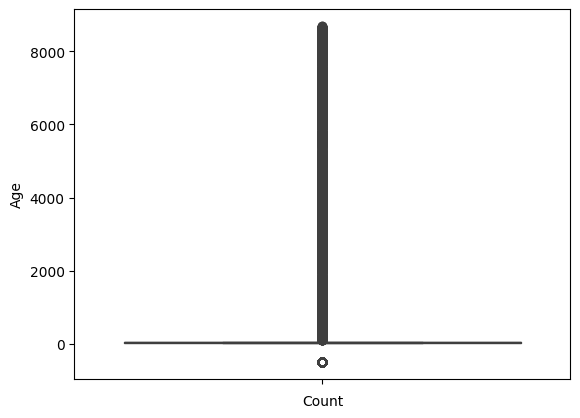

In [217]:
#Afficher les types de données de la colonne 'Age'
# Créer le boxplot
sns.boxplot(y=df['Age'])

# Ajouter des étiquettes aux axes
plt.xlabel('Count')
plt.ylabel('Age')

# Afficher le boxplot
plt.show()

In [218]:
# Utilisation de la méthode IQR pour supprimer les valeurs aberrantes selon l’âge
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
data = df[(df.Age >= Q1 - 1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]

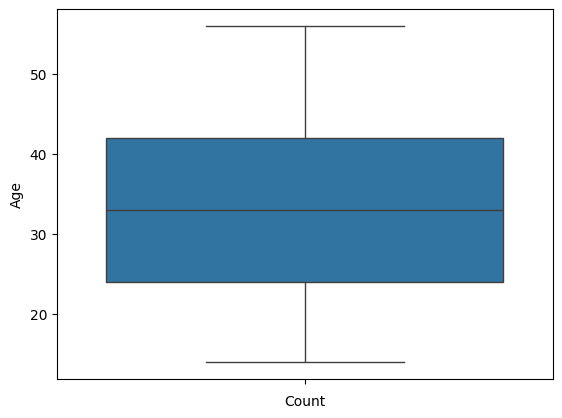

In [219]:
sns.boxplot(y=data["Age"])
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()

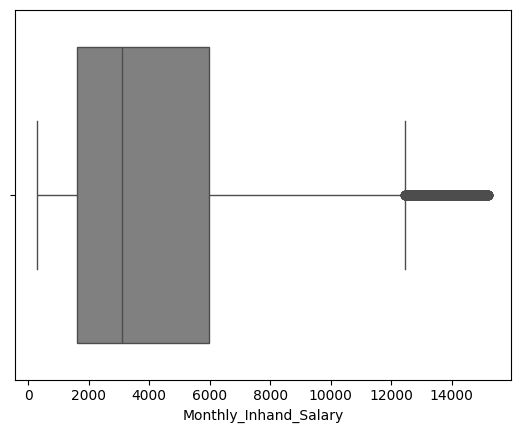

In [220]:
# Créer le graphique de boîte
sns.boxplot(x=df['Monthly_Inhand_Salary'], color='gray')
# Afficher le graphique
plt.show()

<ipython-input-221-2a5a002ebbb7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, palette=palette)


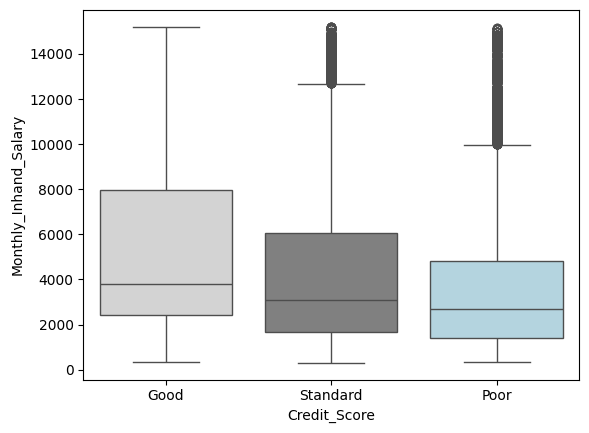

In [221]:
palette = sns.color_palette(['lightgray', 'gray', 'lightblue'], as_cmap=True)
# Créer le graphique de boîte avec la palette définie
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, palette=palette)
plt.show()

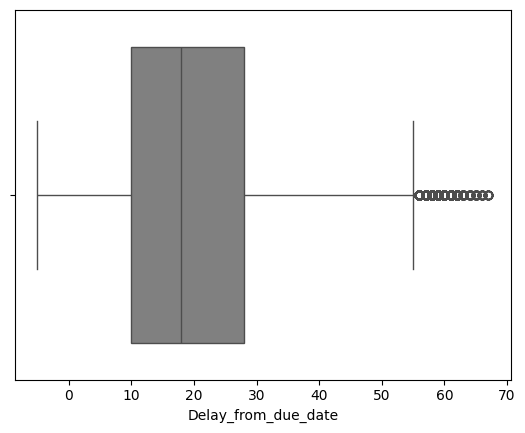

In [222]:
sns.boxplot(x=df['Delay_from_due_date'], color='gray')
plt.show()

<ipython-input-223-de0a771be2e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, palette=palette)


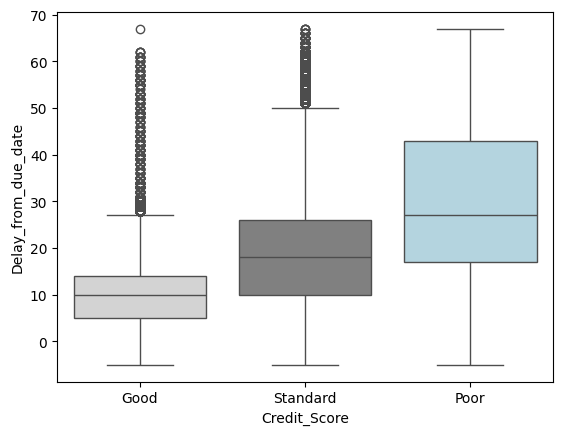

In [223]:
palette = sns.color_palette(['lightgray', 'gray', 'lightblue'], as_cmap=True)
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, palette=palette)
plt.show()

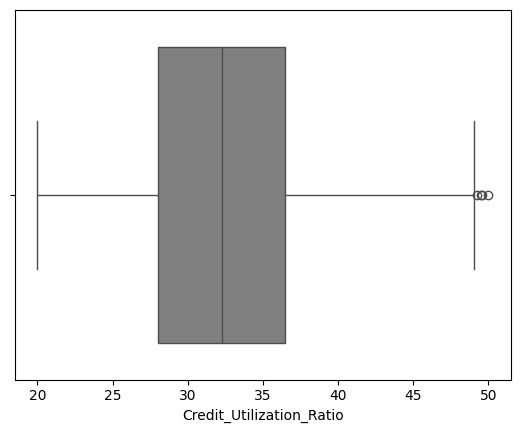

In [224]:
sns.boxplot(x=df['Credit_Utilization_Ratio'], color='gray')
plt.show()

<ipython-input-225-e484c5dd4bd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score',y='Credit_Utilization_Ratio', data=df,palette=palette)


<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

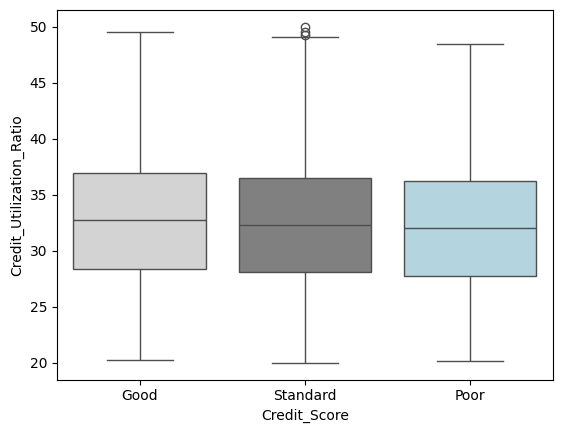

In [225]:
palette = sns.color_palette(['lightgray', 'gray', 'lightblue'], as_cmap=True)
sns.boxplot(x='Credit_Score',y='Credit_Utilization_Ratio', data=df,palette=palette)

<ipython-input-226-e33d037d9ed1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly_Inhand_Salary'])


<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Density'>

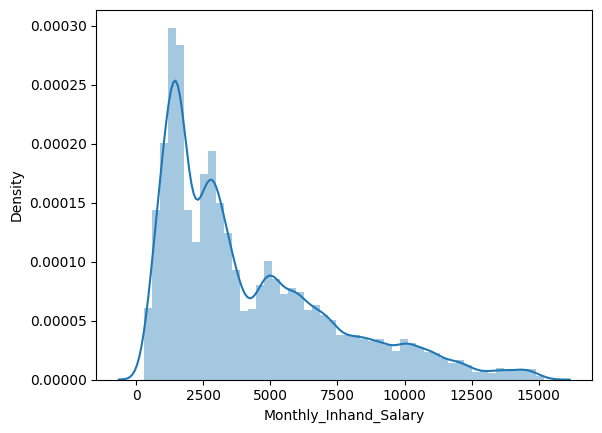

In [226]:
sns.distplot(df['Monthly_Inhand_Salary'])

<ipython-input-227-b30d68904e9d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delay_from_due_date'])


<Axes: xlabel='Delay_from_due_date', ylabel='Density'>

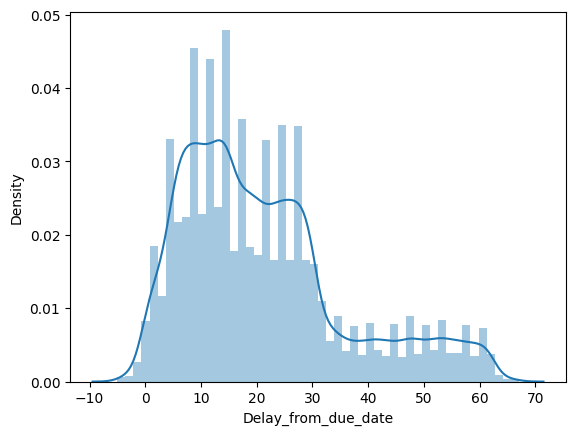

In [227]:
sns.distplot(df['Delay_from_due_date'])

<ipython-input-228-cb5a6451148c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Num_of_Delayed_Payment'])


<Axes: xlabel='Num_of_Delayed_Payment', ylabel='Density'>

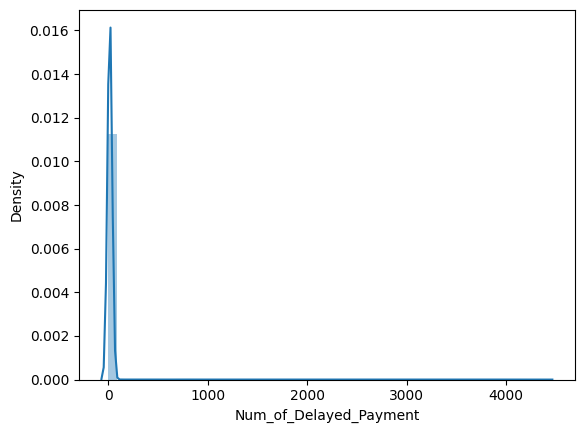

In [228]:
sns.distplot(df['Num_of_Delayed_Payment'])

<ipython-input-229-a9d3a90c634f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_Utilization_Ratio'])


<Axes: xlabel='Credit_Utilization_Ratio', ylabel='Density'>

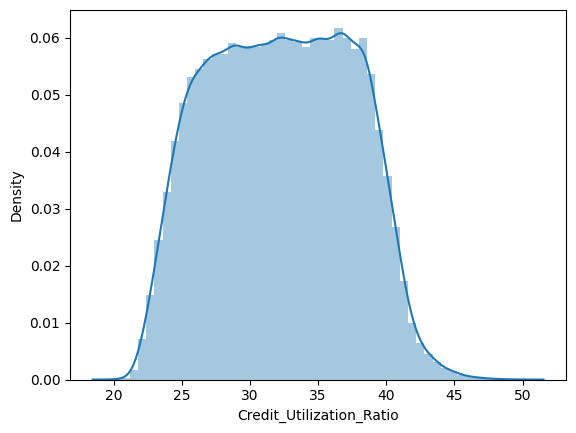

In [229]:
sns.distplot(df['Credit_Utilization_Ratio'])

<ipython-input-230-53efe0e68991>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Credit_Mix',palette=palette)


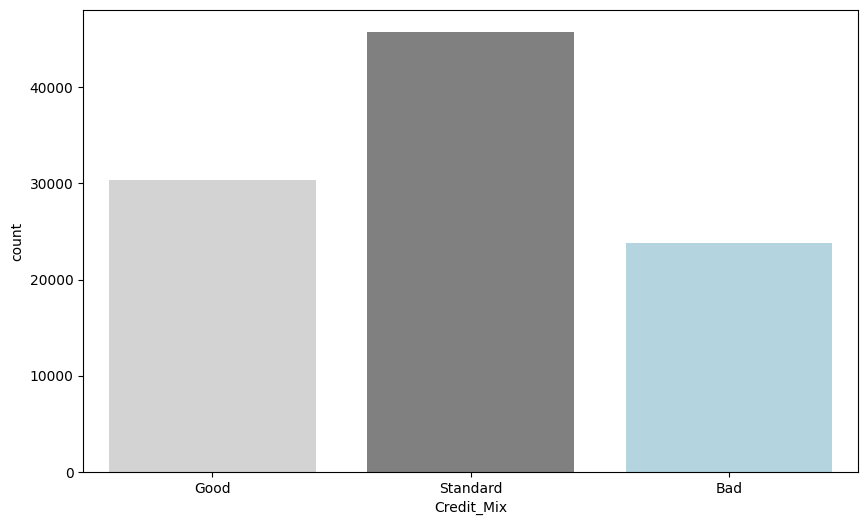

In [230]:
palette = sns.color_palette(['lightgray', 'gray', 'lightblue'], as_cmap=True)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Credit_Mix',palette=palette)
plt.show()

<ipython-input-231-3babe2a1cabd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_of_Min_Amount', palette=custom_palette)


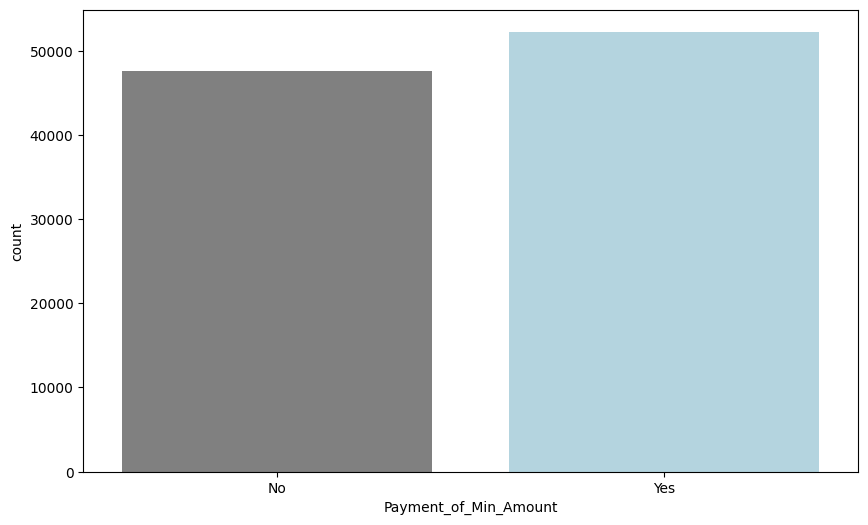

In [231]:
custom_palette = ["gray", "lightblue"]

# Créer le graphique de comptage avec la palette définie
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_of_Min_Amount', palette=custom_palette)

# Afficher le graphique
plt.show()

<ipython-input-232-635d15e621d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_Behaviour', palette=custom_palette)


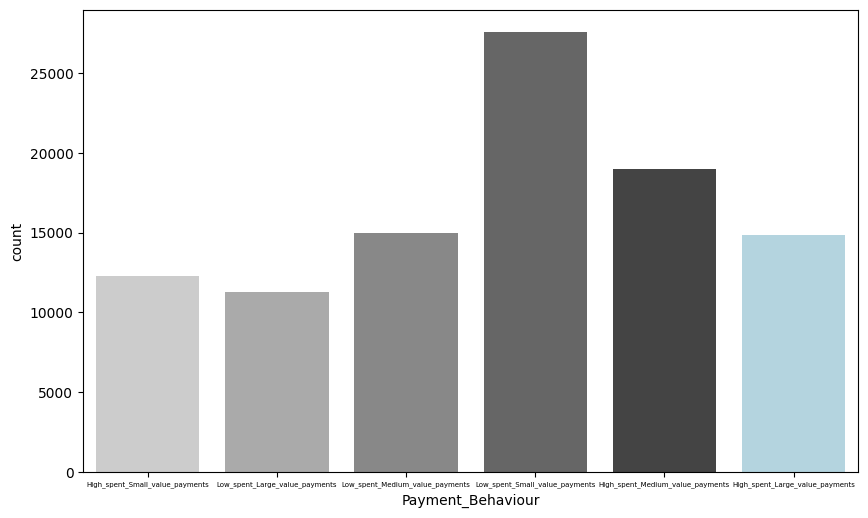

In [232]:
custom_palette = ["#CCCCCC", "#AAAAAA", "#888888", "#666666", "#444444", "lightblue"]

# Créer le graphique de comptage avec la palette définie
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_Behaviour', palette=custom_palette)
plt.xticks(fontsize=12)
plt.tick_params(axis='x', labelsize=5)

# Afficher le graphique
plt.show()

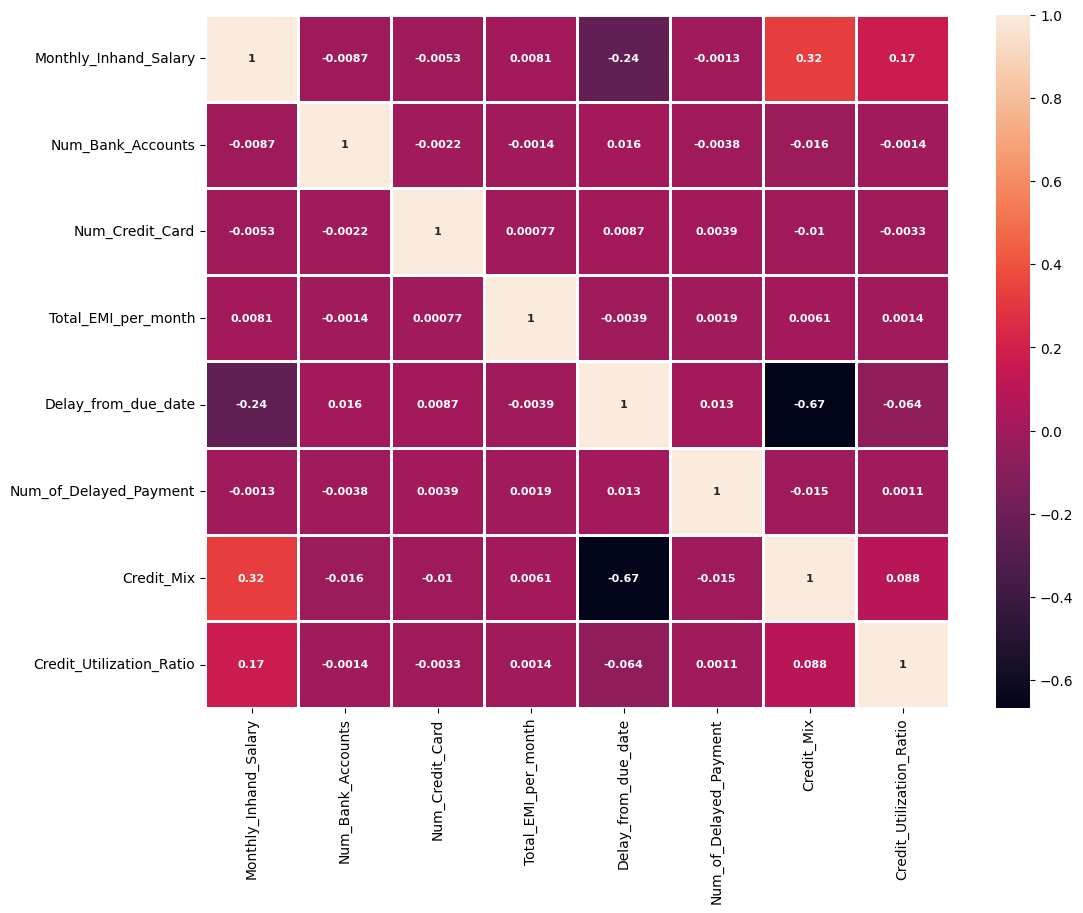

In [198]:
selected_columns = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card','Total_EMI_per_month','Delay_from_due_date','Num_of_Delayed_Payment','Credit_Mix','Credit_Utilization_Ratio']
# Créer une DataFrame contenant uniquement les colonnes sélectionnées
selected_df = df[selected_columns]
# Afficher la heatmap de corrélation pour les colonnes sélectionnées
plt.figure(figsize=(12, 9))
sns.heatmap(selected_df.corr(), annot=True, annot_kws={"size": 8, "fontweight": "bold"}, linewidths=0.9, square=False)
plt.show()

In [233]:
#convertir les catégories en valeurs int
df['Credit_Mix'] = df['Credit_Mix'].replace(["Bad", "Standard", "Good"], [0, 1, 2])
# Modifier les valeurs dans la colonne 'Payment_of_Min_Amount' et convertir en int
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(["No", "Yes"], [0, 1])
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype(int)
# Convertir les catégories de la colonne 'Credit_Score' en valeurs int
df['Credit_Score'] = df['Credit_Score'].replace(["Poor", "Standard", "Good"], [0, 1, 2])
df['Credit_Score'] = df['Credit_Score'].astype(int)

In [234]:
from sklearn.preprocessing import LabelEncoder
# Créez une instance de la classe LabelEncoder
le = LabelEncoder()
# Appliquez la méthode fit_transform() à chaque colonne de données
df['Month'] = le.fit_transform(df['Month'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])
df['Credit_Mix'] = le.fit_transform(df['Credit_Mix'])
df['Payment_of_Min_Amount'] = le.fit_transform(df['Payment_of_Min_Amount'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

In [235]:
#les modèles de machine learning
#Régression lineaire
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Separate features and target variable
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical variables
categorical_cols = ['Month']  # Specify categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

In [236]:
# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
# Predict using the logistic regression model
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Create a DataFrame to display actual and predicted values
result_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred})
print(result_df)

Accuracy Score: 0.61655
       Actual Value  Predicted Value
75721             2                2
80184             0                0
19864             2                2
76699             0                0
92991             2                2
...             ...              ...
32595             1                1
29313             1                1
37862             0                1
53421             1                1
42410             1                1

[20000 rows x 2 columns]


In [237]:
# l'arbre de décision
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Traiter les caractéristiques non numériques dans X_train
for feature in X_train.columns:
    if X_train[feature].dtype == 'object':
        X_train[feature] = label_encoder.fit_transform(X_train[feature])

# Traiter les caractéristiques non numériques dans X_test
for feature in X_test.columns:
    if X_test[feature].dtype == 'object':
        X_test[feature] = label_encoder.transform(X_test[feature])
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Créer une instance du modèle d'arbre de décision
dt = DecisionTreeClassifier()

# Entraîner le modèle sur les données d'entraînement
dt.fit(X_train, y_train)

# Prédire les valeurs sur les données de test
y_pred_dt = dt.predict(X_test)

# Évaluer la précision du modèle
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Score (Decision Tree):", accuracy_dt)

# Afficher les valeurs réelles et prédites
result_df_dt = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred_dt})
print(result_df_dt)

Accuracy Score (Decision Tree): 0.69295
       Actual Value  Predicted Value
75721             2                2
80184             0                0
19864             2                2
76699             0                0
92991             2                2
...             ...              ...
32595             1                1
29313             1                1
37862             0                1
53421             1                1
42410             1                0

[20000 rows x 2 columns]


In [238]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à rechercher
parameters = {
    'max_features': ['log2', 'sqrt'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10, 50],
    'min_samples_split': [2, 3, 50, 100],
    'min_samples_leaf': [1, 5, 8, 10]
}

# Créer une instance de GridSearchCV avec le modèle d'arbre de décision et les hyperparamètres
grid_obj = GridSearchCV(dt, parameters)

# Exécuter la recherche par grille sur les données d'entraînement
grid_obj = grid_obj.fit(X_train, y_train)

# Sélectionner le meilleur estimateur trouvé par la recherche par grille
dt = grid_obj.best_estimator_

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
dt.fit(X_train, y_train)

# Prédire les valeurs sur les données de test
y_pred = dt.predict(X_test)

# Calculer et afficher la précision du modèle après l'optimisation des hyperparamètres
acc_dt = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy after hyperparameter tuning (Decision Tree): ", acc_dt)

Accuracy after hyperparameter tuning (Decision Tree):  70.53


In [196]:
from sklearn.ensemble import RandomForestClassifier

# Créer une instance du modèle de forêt aléatoire
rf = RandomForestClassifier()

# Entraîner le modèle sur les données d'entraînement
rf.fit(X_train, y_train)

# Prédire les valeurs sur les données de test
y_pred = rf.predict(X_test)

# Calculer et afficher la précision du modèle
print("Accuracy Score (Random Forest): ", accuracy_score(y_test, y_pred))

Accuracy Score (Random Forest):  0.7963


[2 0 2 ... 1 1 0]
[[4768 1036   70]
 [1255 8580  764]
 [  21  930 2576]]


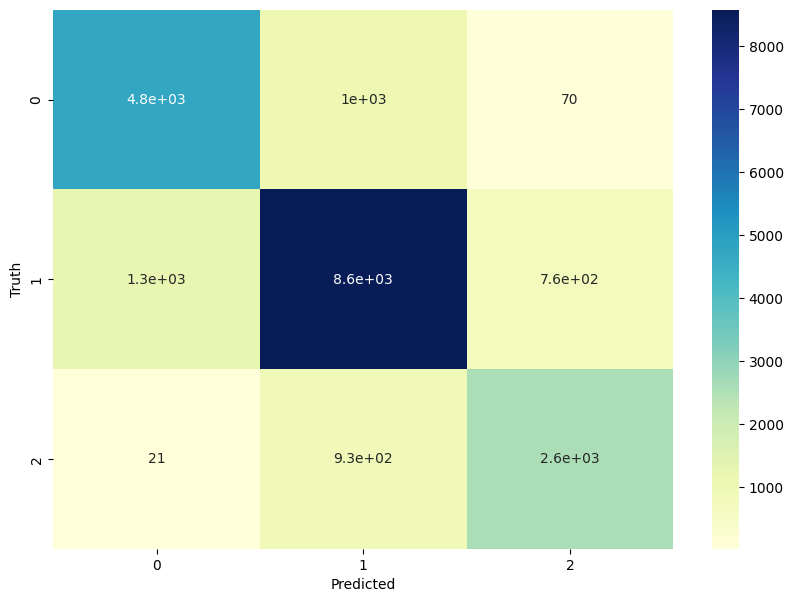

In [197]:
rf.fit(X_train, y_train)
# Prédire les données de test avec le modèle RandomForestClassifier
y_pred = rf.predict(X_test)
# Afficher les prédictions
print(y_pred)
# Importer la matrice de confusion
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
ConfusionMetricModel = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print(ConfusionMetricModel)

# Afficher la matrice de confusion sous forme de heatmap
cmap = "YlGnBu"
plt.figure(figsize=(10, 7))
sns.heatmap(ConfusionMetricModel, annot=True, cmap=cmap)  # Add cmap argument
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()